In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
data = pd.read_csv("../data/tale-of-two-gigs/tale_of_two_gigs_netrics.csv")
data["time"] = pd.to_datetime(data["time"])
data = data[data.time <= '2021-08-26 16:07:09.271942+00:00']
plot_vars = [
    'speedtest_ookla_download',
    'speedtest_ndt7_download',
    'google_rtt_max_ms_under_ul',
    'google_rtt_max_ms_under_dl',
    'google_rtt_max_ms',
    'dns_query_avg_ms',
    'time',
    'install'
]
data_long = data[plot_vars].melt(
    id_vars=["time", "install"]
)
data_long.head()

,time,install,variable,value
0,2021-06-30 18:50:28.262038+00:00,Hyde Park,speedtest_ookla_download,NaN
1,2021-06-30 18:55:27.575799+00:00,Hyde Park,speedtest_ookla_download,NaN
2,2021-06-30 19:00:28.483208+00:00,Hyde Park,speedtest_ookla_download,NaN
3,2021-06-30 19:05:28.049947+00:00,Hyde Park,speedtest_ookla_download,NaN
4,2021-06-30 19:10:26.905425+00:00,Hyde Park,speedtest_ookla_download,NaN


In [3]:
data.groupby("install").agg(["mean", "median", "min", "max", "count"])

speedtest_ookla_download                                      \
                                mean      median         min         max   
install                                                                    
Hyde Park                 904.022170  940.945856  246.845704  947.378016   
South Shore               792.895609  804.252280   12.937048  844.527392   

                  speedtest_ookla_upload                                   \
            count                   mean     median        min        max   
install                                                                     
Hyde Park     646              41.364029  41.744272  18.475624  43.523528   
South Shore   649              41.533419  41.786392  28.204792  42.427776   

                   ... dns_query_avg_ms                             \
            count  ...             mean median   min    max  count   
install            ...                                               
Hyde Park     646  ...        25.333239   23.5  10.5  522.0  16236   
South Shore   649  ...        27.713725   26.0  14.5  283.5  16298   

            dns_query_max_ms                              
                        mean median   min     max  count  
install                                                   
Hyde Park          70.501109   51.0  27.0  4027.0  16236  
South Shore        69.108664   55.0  23.0  2059.0  16298  

[2 rows x 70 columns]

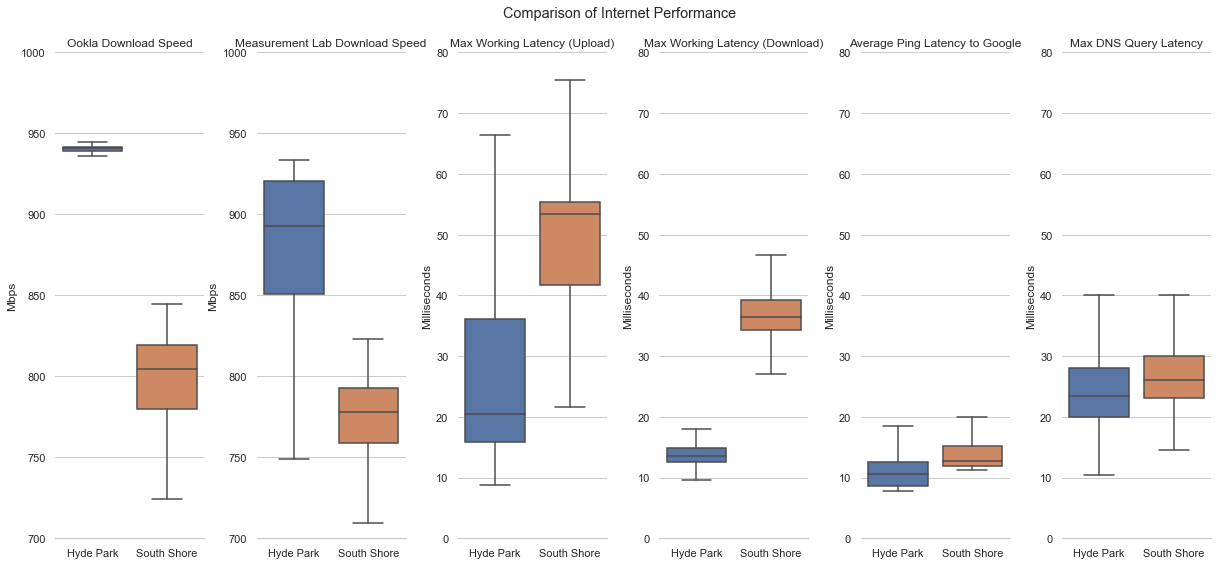

In [4]:
sns.set(
    style="whitegrid"
)
g = sns.catplot(
    x="install",
    y="value",
    col="variable",
    data=data_long,
    kind="box",
    sharey=False,
    showfliers=False,
    height=8,
    aspect=0.35
)
for ax in g.axes[0]:
    ax.set_xlabel(None)
    if "ms" in ax.title.get_text():
        ax.set_ylim(0, 80)
        ax.set_ylabel("Milliseconds")
    if "speedtest" in ax.title.get_text():
        ax.set_ylim(700,1000)
        ax.set_ylabel("Mbps")
    if "ookla" in ax.title.get_text():
        ax.title.set_text("Ookla Download Speed")
    if "ndt7" in ax.title.get_text():
        ax.title.set_text("Measurement Lab Download Speed")
    if "under_ul" in ax.title.get_text():
        ax.title.set_text("Max Working Latency (Upload)")
    if "under_dl" in ax.title.get_text():
        ax.title.set_text("Max Working Latency (Download)")
    if ax.title.get_text() == "variable = google_rtt_max_ms":
        ax.title.set_text("Average Ping Latency to Google")
    if "query" in ax.title.get_text():
        ax.title.set_text("Max DNS Query Latency")
g.fig.subplots_adjust(
    wspace=0.35,
    top=0.9
)
g.fig.suptitle("Comparison of Internet Performance")
sns.despine(left=True)

Text(0.5, 1.0, 'Ookla Download Speeds Comparison')

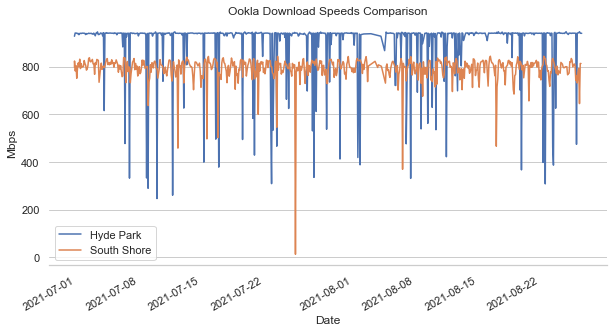

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.set_style("whitegrid")
sns.despine(left=True)
data[(~data.speedtest_ookla_download.isna())].groupby("install")[["time", "speedtest_ookla_download"]].plot(
    x="time",
    y="speedtest_ookla_download",
    ax=ax
)
ax.legend(["Hyde Park", "South Shore"])
ax.set_ylabel("Mbps")
ax.set_xlabel("Date")
ax.xaxis.grid(False)
ax.set_title("Ookla Download Speeds Comparison")

Text(0.5, 1.0, 'Working Latency (Download) Comparison')

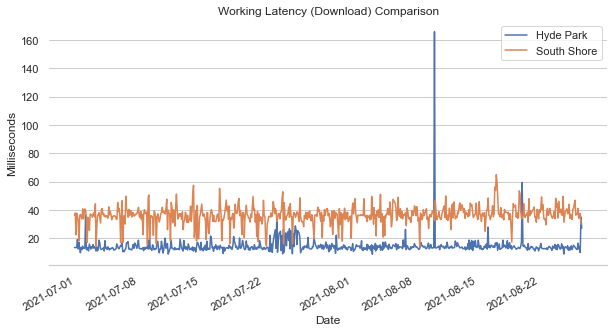

In [6]:
# end the x-axis for both lines at the same point
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.set_style("whitegrid")
sns.despine(left=True)
data[(~data.google_rtt_max_ms_under_dl.isna())].groupby("install")[["time", "google_rtt_max_ms_under_dl"]].plot(
    x="time",
    y="google_rtt_max_ms_under_dl",
    ax=ax
)
ax.set_ylabel('Milliseconds')
ax.set_xlabel("Date")
ax.xaxis.grid(False)
ax.legend(["Hyde Park", "South Shore"])
ax.set_title("Working Latency (Download) Comparison")